## Decision Tree Algorithms

In [1]:
import pandas as pd
raw_data=pd.read_excel('SECOM.xlsx',"secom")
raw_data=raw_data.drop(raw_data.columns[0],axis=1)
raw_data=raw_data.drop(["Time"],axis=1)
raw_data.head()

,Sensor_1,Sensor_2,Sensor_3,Sensor_4,Sensor_5,Sensor_6,Sensor_7,Sensor_8,Sensor_9,Sensor_10,...,Sensor_582,Sensor_583,Sensor_584,Sensor_585,Sensor_586,Sensor_587,Sensor_588,Sensor_589,Sensor_590,Label
0,3030.93,2564.00,2187.7333,1411.1265,1.3602,100.0,97.6133,0.1242,1.5005,0.0162,...,NaN,0.5005,0.0118,0.0035,2.3630,NaN,NaN,NaN,NaN,-1
1,3095.78,2465.14,2230.4222,1463.6606,0.8294,100.0,102.3433,0.1247,1.4966,-0.0005,...,208.2045,0.5019,0.0223,0.0055,4.4447,0.0096,0.0201,0.0060,208.2045,-1
2,2932.61,2559.94,2186.4111,1698.0172,1.5102,100.0,95.4878,0.1241,1.4436,0.0041,...,82.8602,0.4958,0.0157,0.0039,3.1745,0.0584,0.0484,0.0148,82.8602,1
3,2988.72,2479.90,2199.0333,909.7926,1.3204,100.0,104.2367,0.1217,1.4882,-0.0124,...,73.8432,0.4990,0.0103,0.0025,2.0544,0.0202,0.0149,0.0044,73.8432,-1
4,3032.24,2502.87,2233.3667,1326.5200,1.5334,100.0,100.3967,0.1235,1.5031,-0.0031,...,NaN,0.4800,0.4766,0.1045,99.3032,0.0202,0.0149,0.0044,73.8432,-1


In [2]:
raw_data.describe()

,Sensor_1,Sensor_2,Sensor_3,Sensor_4,Sensor_5,Sensor_6,Sensor_7,Sensor_8,Sensor_9,Sensor_10,...,Sensor_582,Sensor_583,Sensor_584,Sensor_585,Sensor_586,Sensor_587,Sensor_588,Sensor_589,Sensor_590,Label
count,1561.000000,1560.000000,1553.000000,1553.000000,1553.000000,1553.0,1553.000000,1558.000000,1565.000000,1565.000000,...,618.000000,1566.000000,1566.000000,1566.000000,1566.000000,1566.000000,1566.000000,1566.000000,1566.000000,1567.000000
mean,3014.452896,2495.850231,2200.547318,1396.376627,4.197013,100.0,101.112908,0.121822,1.462862,-0.000841,...,97.934373,0.500096,0.015318,0.003847,3.067826,0.021458,0.016475,0.005283,99.670066,-0.867262
std,73.621787,80.407705,29.513152,441.691640,56.355540,0.0,6.237214,0.008961,0.073897,0.015116,...,87.520966,0.003404,0.017180,0.003720,3.578033,0.012358,0.008808,0.002867,93.891919,0.498010
min,2743.240000,2158.750000,2060.660000,0.000000,0.681500,100.0,82.131100,0.000000,1.191000,-0.053400,...,0.000000,0.477800,0.006000,0.001700,1.197500,-0.016900,0.003200,0.001000,0.000000,-1.000000
25%,2966.260000,2452.247500,2181.044400,1081.875800,1.017700,100.0,97.920000,0.121100,1.411200,-0.010800,...,46.184900,0.497900,0.011600,0.003100,2.306500,0.013425,0.010600,0.003300,44.368600,-1.000000
50%,3011.490000,2499.405000,2201.066700,1285.214400,1.316800,100.0,101.512200,0.122400,1.461600,-0.001300,...,72.288900,0.500200,0.013800,0.003600,2.757650,0.020500,0.014800,0.004600,71.900500,-1.000000
75%,3056.650000,2538.822500,2218.055500,1591.223500,1.525700,100.0,104.586700,0.123800,1.516900,0.008400,...,116.539150,0.502375,0.016500,0.004100,3.295175,0.027600,0.020300,0.006400,114.749700,-1.000000
max,3356.350000,2846.440000,2315.266700,3715.041700,1114.536600,100.0,129.252200,0.128600,1.656400,0.074900,...,737.304800,0.509800,0.476600,0.104500,99.303200,0.102800,0.079900,0.028600,737.304800,1.000000


In [3]:
#Drop the redundant column
NoRedundant_data=raw_data
count=0
droplist=[]

for i in range(len(raw_data.columns)):
    if(raw_data.iloc[:,i].max()==raw_data.iloc[:,i].min()):
        droplist.append(i)
        count=count+1

for i in range(len(droplist)):
    s="Sensor_"+str(droplist[i]+1)
    NoRedundant_data=NoRedundant_data.drop([s],axis=1)
    
print("Number of Redundant Column:",count)
print(droplist)
NoRedundant_data.head(10)

Number of Redundant Column: 116
[5, 13, 42, 49, 52, 69, 97, 141, 149, 178, 179, 186, 189, 190, 191, 192, 193, 194, 226, 229, 230, 231, 232, 233, 234, 235, 236, 237, 240, 241, 242, 243, 256, 257, 258, 259, 260, 261, 262, 263, 264, 265, 266, 276, 284, 313, 314, 315, 322, 325, 326, 327, 328, 329, 330, 364, 369, 370, 371, 372, 373, 374, 375, 378, 379, 380, 381, 394, 395, 396, 397, 398, 399, 400, 401, 402, 403, 404, 414, 422, 449, 450, 451, 458, 461, 462, 463, 464, 465, 466, 481, 498, 501, 502, 503, 504, 505, 506, 507, 508, 509, 512, 513, 514, 515, 528, 529, 530, 531, 532, 533, 534, 535, 536, 537, 538]


,Sensor_1,Sensor_2,Sensor_3,Sensor_4,Sensor_5,Sensor_7,Sensor_8,Sensor_9,Sensor_10,Sensor_11,...,Sensor_582,Sensor_583,Sensor_584,Sensor_585,Sensor_586,Sensor_587,Sensor_588,Sensor_589,Sensor_590,Label
0,3030.93,2564.00,2187.7333,1411.1265,1.3602,97.6133,0.1242,1.5005,0.0162,-0.0034,...,NaN,0.5005,0.0118,0.0035,2.3630,NaN,NaN,NaN,NaN,-1
1,3095.78,2465.14,2230.4222,1463.6606,0.8294,102.3433,0.1247,1.4966,-0.0005,-0.0148,...,208.2045,0.5019,0.0223,0.0055,4.4447,0.0096,0.0201,0.0060,208.2045,-1
2,2932.61,2559.94,2186.4111,1698.0172,1.5102,95.4878,0.1241,1.4436,0.0041,0.0013,...,82.8602,0.4958,0.0157,0.0039,3.1745,0.0584,0.0484,0.0148,82.8602,1
3,2988.72,2479.90,2199.0333,909.7926,1.3204,104.2367,0.1217,1.4882,-0.0124,-0.0033,...,73.8432,0.4990,0.0103,0.0025,2.0544,0.0202,0.0149,0.0044,73.8432,-1
4,3032.24,2502.87,2233.3667,1326.5200,1.5334,100.3967,0.1235,1.5031,-0.0031,-0.0072,...,NaN,0.4800,0.4766,0.1045,99.3032,0.0202,0.0149,0.0044,73.8432,-1
5,2946.25,2432.84,2233.3667,1326.5200,1.5334,100.3967,0.1235,1.5287,0.0167,0.0055,...,44.0077,0.4949,0.0189,0.0044,3.8276,0.0342,0.0151,0.0052,44.0077,-1
6,3030.27,2430.12,2230.4222,1463.6606,0.8294,102.3433,0.1247,1.5816,-0.0270,0.0105,...,NaN,0.5010,0.0143,0.0042,2.8515,0.0342,0.0151,0.0052,44.0077,-1
7,3058.88,2690.15,2248.9000,1004.4692,0.7884,106.2400,0.1185,1.5153,0.0157,0.0007,...,95.0310,0.4984,0.0106,0.0034,2.1261,0.0204,0.0194,0.0063,95.0310,-1
8,2967.68,2600.47,2248.9000,1004.4692,0.7884,106.2400,0.1185,1.5358,0.0111,-0.0066,...,111.6525,0.4993,0.0172,0.0046,3.4456,0.0111,0.0124,0.0045,111.6525,-1
9,3016.11,2428.37,2248.9000,1004.4692,0.7884,106.2400,0.1185,1.5381,0.0159,0.0049,...,90.2294,0.4967,0.0152,0.0038,3.0687,0.0212,0.0191,0.0073,90.2294,-1


In [4]:
#impute the missing value by KNN method
from sklearn.impute import KNNImputer
from pandas import DataFrame
imputer = KNNImputer(n_neighbors=5)
imputer.fit(NoRedundant_data)
knn_rm_data = imputer.transform(NoRedundant_data)
columns_Name=NoRedundant_data.columns
knn_rm_data=DataFrame(knn_rm_data,columns=NoRedundant_data.columns)
knn_rm_data.head(25)

,Sensor_1,Sensor_2,Sensor_3,Sensor_4,Sensor_5,Sensor_7,Sensor_8,Sensor_9,Sensor_10,Sensor_11,...,Sensor_582,Sensor_583,Sensor_584,Sensor_585,Sensor_586,Sensor_587,Sensor_588,Sensor_589,Sensor_590,Label
0,3030.930,2564.00,2187.73330,1411.12650,1.36020,97.61330,0.1242,1.5005,0.0162,-0.0034,...,76.26292,0.5005,0.0118,0.0035,2.3630,0.01942,0.01266,0.00438,65.5742,-1.0
1,3095.780,2465.14,2230.42220,1463.66060,0.82940,102.34330,0.1247,1.4966,-0.0005,-0.0148,...,208.20450,0.5019,0.0223,0.0055,4.4447,0.00960,0.02010,0.00600,208.2045,-1.0
2,2932.610,2559.94,2186.41110,1698.01720,1.51020,95.48780,0.1241,1.4436,0.0041,0.0013,...,82.86020,0.4958,0.0157,0.0039,3.1745,0.05840,0.04840,0.01480,82.8602,1.0
3,2988.720,2479.90,2199.03330,909.79260,1.32040,104.23670,0.1217,1.4882,-0.0124,-0.0033,...,73.84320,0.4990,0.0103,0.0025,2.0544,0.02020,0.01490,0.00440,73.8432,-1.0
4,3032.240,2502.87,2233.36670,1326.52000,1.53340,100.39670,0.1235,1.5031,-0.0031,-0.0072,...,144.17846,0.4800,0.4766,0.1045,99.3032,0.02020,0.01490,0.00440,73.8432,-1.0
5,2946.250,2432.84,2233.36670,1326.52000,1.53340,100.39670,0.1235,1.5287,0.0167,0.0055,...,44.00770,0.4949,0.0189,0.0044,3.8276,0.03420,0.01510,0.00520,44.0077,-1.0
6,3030.270,2430.12,2230.42220,1463.66060,0.82940,102.34330,0.1247,1.5816,-0.0270,0.0105,...,110.92410,0.5010,0.0143,0.0042,2.8515,0.03420,0.01510,0.00520,44.0077,-1.0
7,3058.880,2690.15,2248.90000,1004.46920,0.78840,106.24000,0.1185,1.5153,0.0157,0.0007,...,95.03100,0.4984,0.0106,0.0034,2.1261,0.02040,0.01940,0.00630,95.0310,-1.0
8,2967.680,2600.47,2248.90000,1004.46920,0.78840,106.24000,0.1185,1.5358,0.0111,-0.0066,...,111.65250,0.4993,0.0172,0.0046,3.4456,0.01110,0.01240,0.00450,111.6525,-1.0
9,3016.110,2428.37,2248.90000,1004.46920,0.78840,106.24000,0.1185,1.5381,0.0159,0.0049,...,90.22940,0.4967,0.0152,0.0038,3.0687,0.02120,0.01910,0.00730,90.2294,-1.0


In [5]:
# Decision Tree (Prepared)
from sklearn.tree import DecisionTreeRegressor
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import cross_val_score
from sklearn.utils import shuffle

prepared_data=shuffle(knn_rm_data)
X_prepared=prepared_data.drop(["Label"],axis=1)
y_prepared=prepared_data["Label"]

tree_model=DecisionTreeClassifier(random_state=87)
accuracy=cross_val_score(tree_model,X_prepared,y_prepared,scoring='accuracy',cv=10)
F1=cross_val_score(tree_model,X_prepared,y_prepared,scoring='f1',cv=10)
AUC=cross_val_score(tree_model,X_prepared,y_prepared,scoring='roc_auc',cv=10)

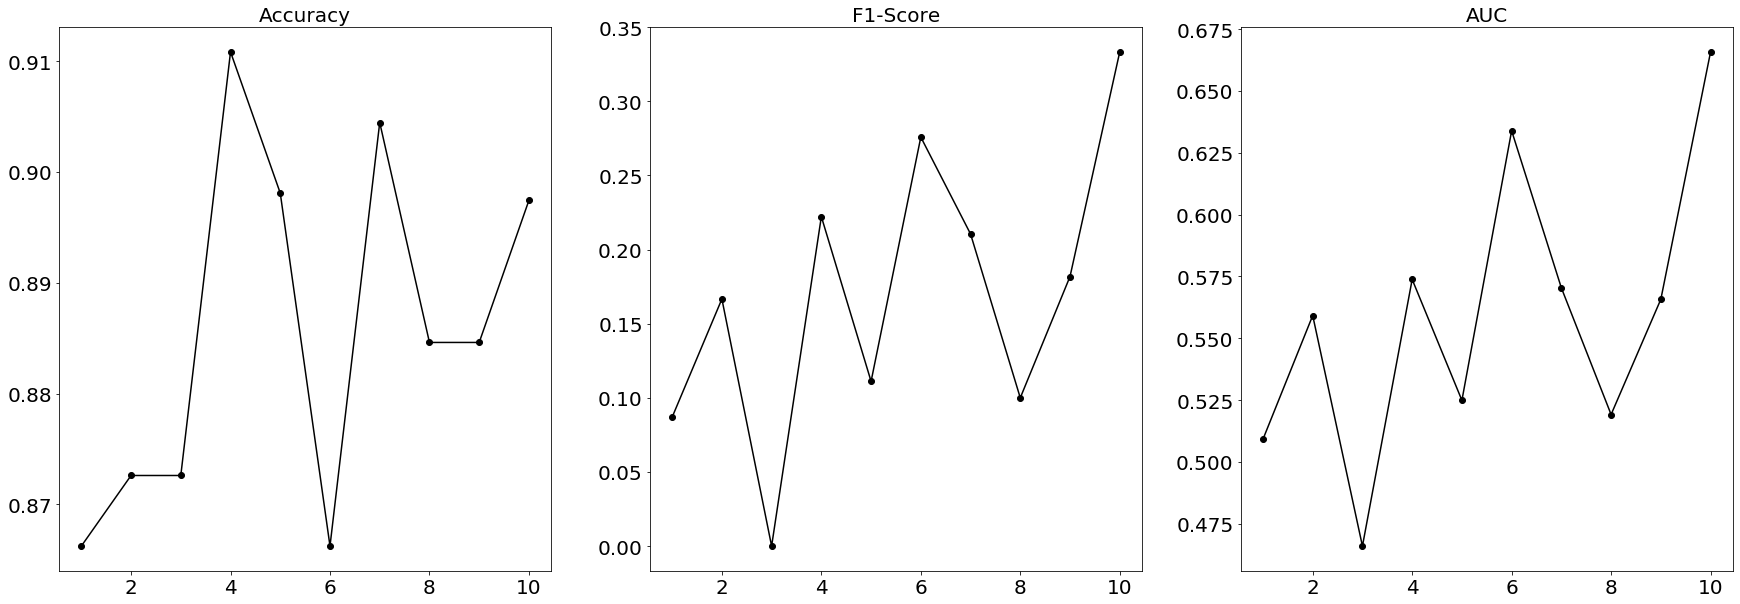

In [6]:
import matplotlib
import matplotlib.pyplot as plt
%matplotlib inline

X_label=[]
for i in range(10):
    X_label.append(i+1)

plt.figure(figsize=(30,10))


plt.subplot(1,3,1)
plt.plot(X_label,accuracy, 'ko-')
plt.title("Accuracy",fontsize=20)
plt.tick_params(labelsize=20)

plt.subplot(1,3,2)
plt.plot(X_label,F1, 'ko-')
plt.title("F1-Score",fontsize=20)
plt.tick_params(labelsize=20)

plt.subplot(1,3,3)
plt.plot(X_label,AUC, 'ko-')
plt.title("AUC",fontsize=20)
plt.tick_params(labelsize=20)

plt.show()


In [7]:
# make minority class upsampiling
from sklearn.utils import resample
data_majority=prepared_data[prepared_data.Label==-1]
data_minority=prepared_data[prepared_data.Label==1]
data_minority_upsample=resample(data_minority,replace=True,n_samples=len(data_majority),random_state=87)
balanced_data=pd.concat([data_majority,data_minority_upsample])
balanced_data=shuffle(balanced_data)

In [8]:
# Decision Tree (Balanced)
X_balanced=balanced_data.drop(["Label"],axis=1)
y_balanced=balanced_data["Label"]

tree_model=DecisionTreeClassifier(random_state=87)
accuracy=cross_val_score(tree_model,X_balanced,y_balanced,scoring='accuracy',cv=10)
F1=cross_val_score(tree_model,X_balanced,y_balanced,scoring='f1',cv=10)
AUC=cross_val_score(tree_model,X_balanced,y_balanced,scoring='roc_auc',cv=10)

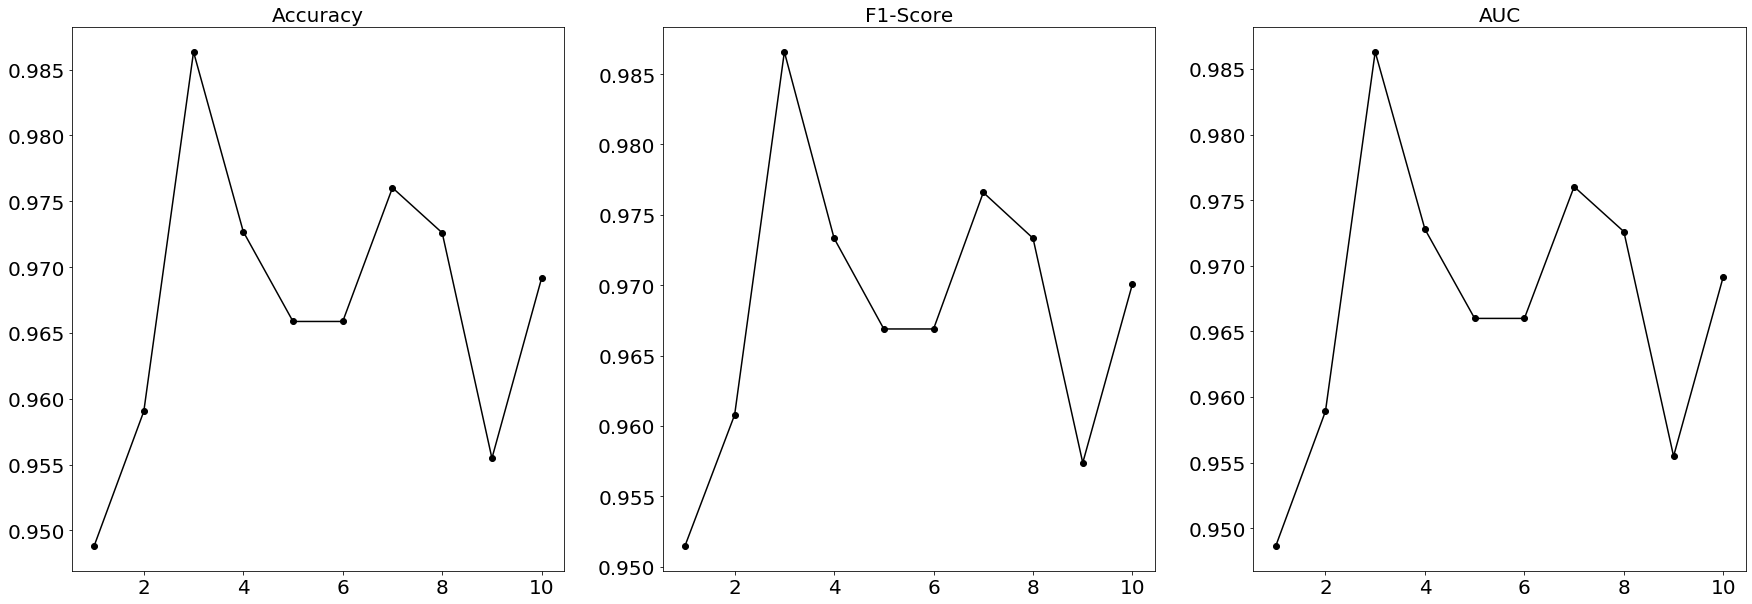

In [9]:
X_label=[]
for i in range(10):
    X_label.append(i+1)

plt.figure(figsize=(30,10))

plt.subplot(1,3,1)
plt.plot(X_label,accuracy, 'ko-')
plt.title("Accuracy",fontsize=20)
plt.tick_params(labelsize=20)

plt.subplot(1,3,2)
plt.plot(X_label,F1, 'ko-')
plt.title("F1-Score",fontsize=20)
plt.tick_params(labelsize=20)

plt.subplot(1,3,3)
plt.plot(X_label,AUC, 'ko-')
plt.title("AUC",fontsize=20)
plt.tick_params(labelsize=20)

plt.show()

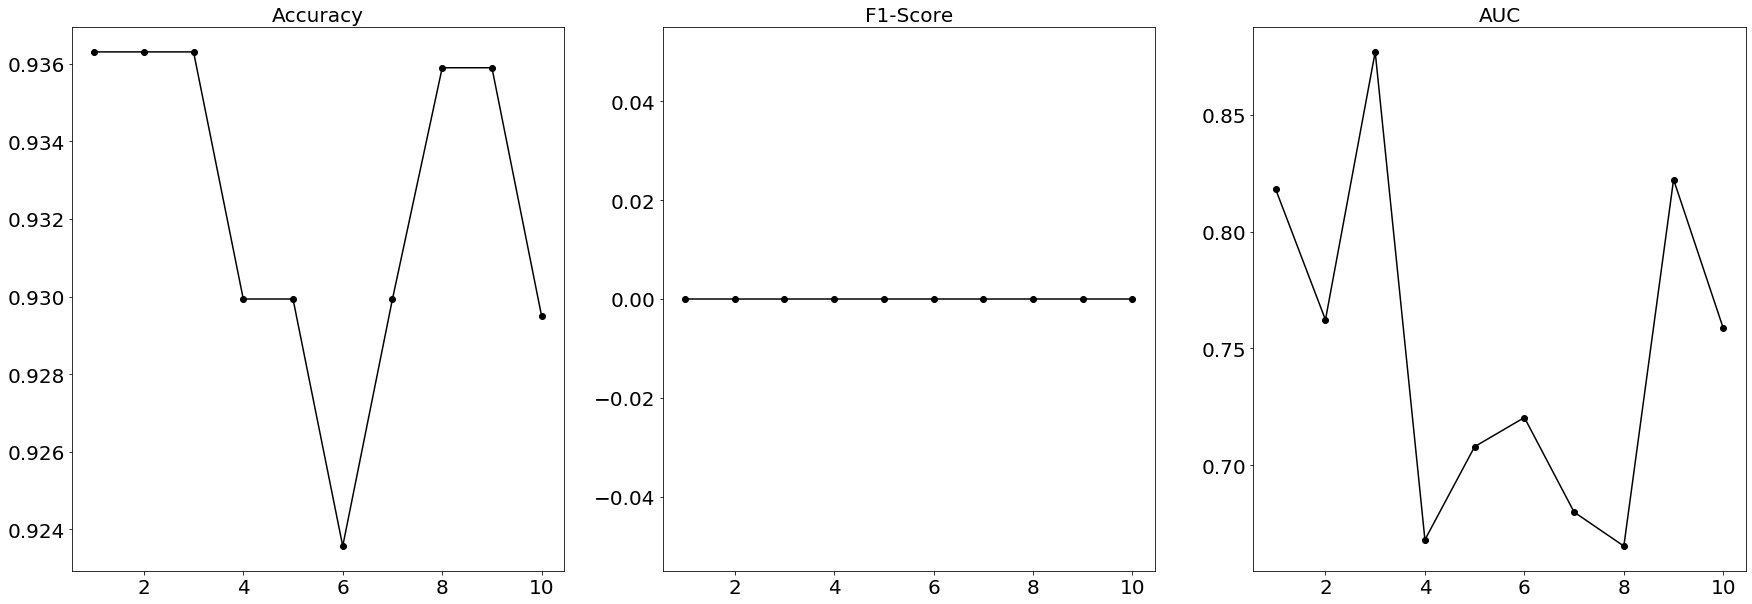

In [10]:
# RandomForest (prepared Dataset)
from sklearn.ensemble import RandomForestClassifier

forest_model=RandomForestClassifier(n_estimators=100,random_state=87)
accuracy=cross_val_score(forest_model,X_prepared,y_prepared,scoring='accuracy',cv=10)
F1=cross_val_score(forest_model,X_prepared,y_prepared,scoring='f1',cv=10)
AUC=cross_val_score(forest_model,X_prepared,y_prepared,scoring='roc_auc',cv=10)

X_label=[]
for i in range(10):
    X_label.append(i+1)

plt.figure(figsize=(30,10))

plt.subplot(1,3,1)
plt.plot(X_label,accuracy, 'ko-')
plt.title("Accuracy",fontsize=20)
plt.tick_params(labelsize=20)

plt.subplot(1,3,2)
plt.plot(X_label,F1, 'ko-')
plt.title("F1-Score",fontsize=20)
plt.tick_params(labelsize=20)

plt.subplot(1,3,3)
plt.plot(X_label,AUC, 'ko-')
plt.title("AUC",fontsize=20)
plt.tick_params(labelsize=20)

plt.show()

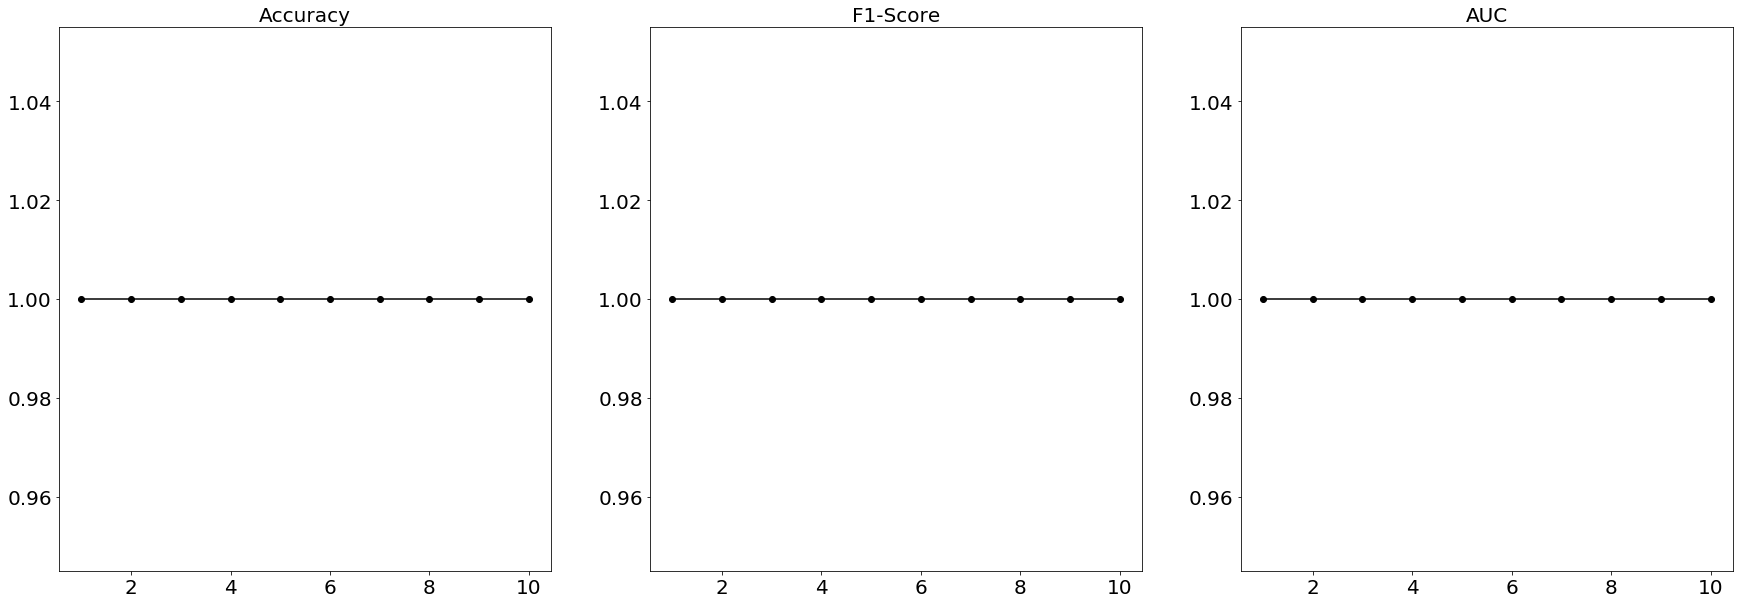

In [11]:
# RandomForest (balanced Dataset)
forest_model=RandomForestClassifier(n_estimators=100,random_state=87)
accuracy=cross_val_score(forest_model,X_balanced,y_balanced,scoring='accuracy',cv=10)
F1=cross_val_score(forest_model,X_balanced,y_balanced,scoring='f1',cv=10)
AUC=cross_val_score(forest_model,X_balanced,y_balanced,scoring='roc_auc',cv=10)

X_label=[]
for i in range(10):
    X_label.append(i+1)

plt.figure(figsize=(30,10))

plt.subplot(1,3,1)
plt.plot(X_label,accuracy, 'ko-')
plt.title("Accuracy",fontsize=20)
plt.tick_params(labelsize=20)

plt.subplot(1,3,2)
plt.plot(X_label,F1, 'ko-')
plt.title("F1-Score",fontsize=20)
plt.tick_params(labelsize=20)

plt.subplot(1,3,3)
plt.plot(X_label,AUC, 'ko-')
plt.title("AUC",fontsize=20)
plt.tick_params(labelsize=20)

plt.show()

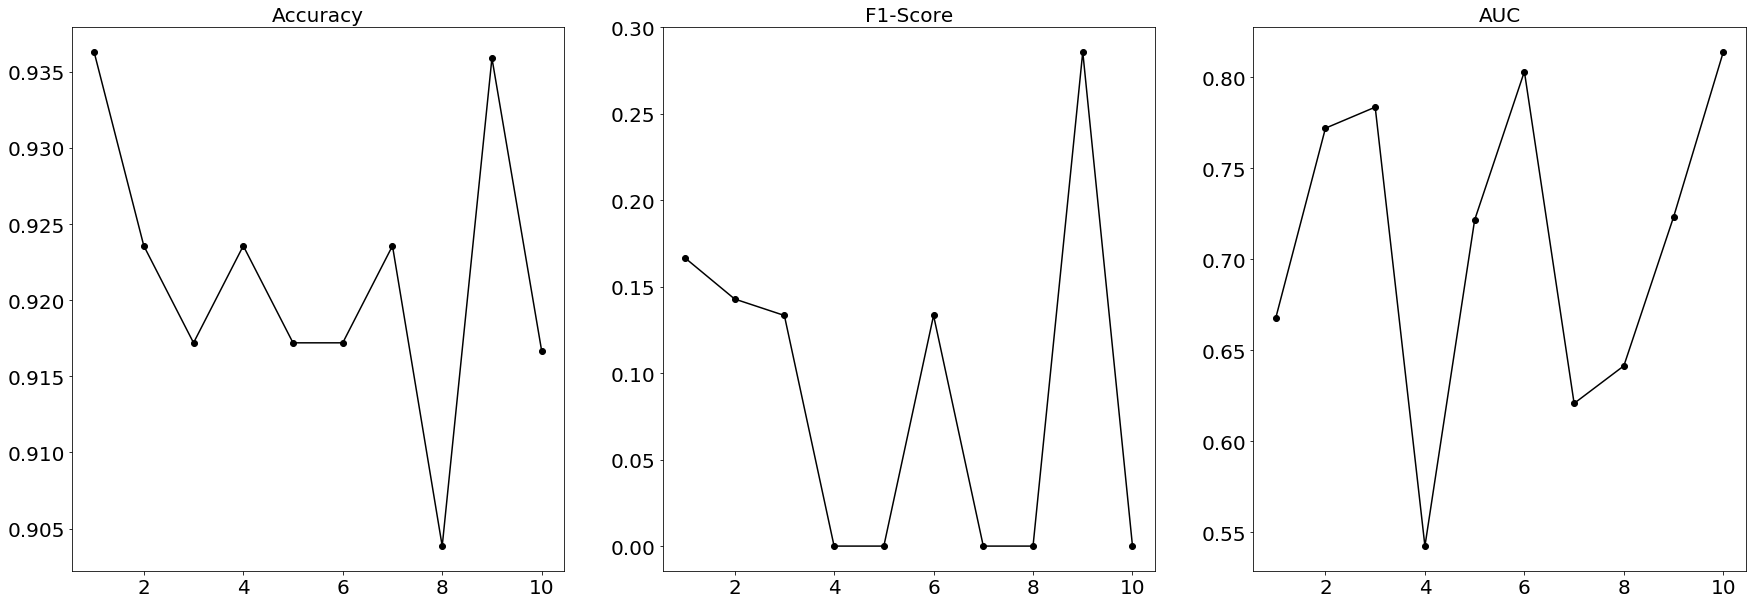

In [12]:
# GDBT(prepared Dataset)
from sklearn.ensemble import GradientBoostingClassifier

GBDT_model=GradientBoostingClassifier(n_estimators=100,random_state=87)
accuracy=cross_val_score(GBDT_model,X_prepared,y_prepared,scoring='accuracy',cv=10)
F1=cross_val_score(GBDT_model,X_prepared,y_prepared,scoring='f1',cv=10)
AUC=cross_val_score(GBDT_model,X_prepared,y_prepared,scoring='roc_auc',cv=10)

X_label=[]
for i in range(10):
    X_label.append(i+1)

plt.figure(figsize=(30,10))

plt.subplot(1,3,1)
plt.plot(X_label,accuracy, 'ko-')
plt.title("Accuracy",fontsize=20)
plt.tick_params(labelsize=20)

plt.subplot(1,3,2)
plt.plot(X_label,F1, 'ko-')
plt.title("F1-Score",fontsize=20)
plt.tick_params(labelsize=20)

plt.subplot(1,3,3)
plt.plot(X_label,AUC, 'ko-')
plt.title("AUC",fontsize=20)
plt.tick_params(labelsize=20)

plt.show()

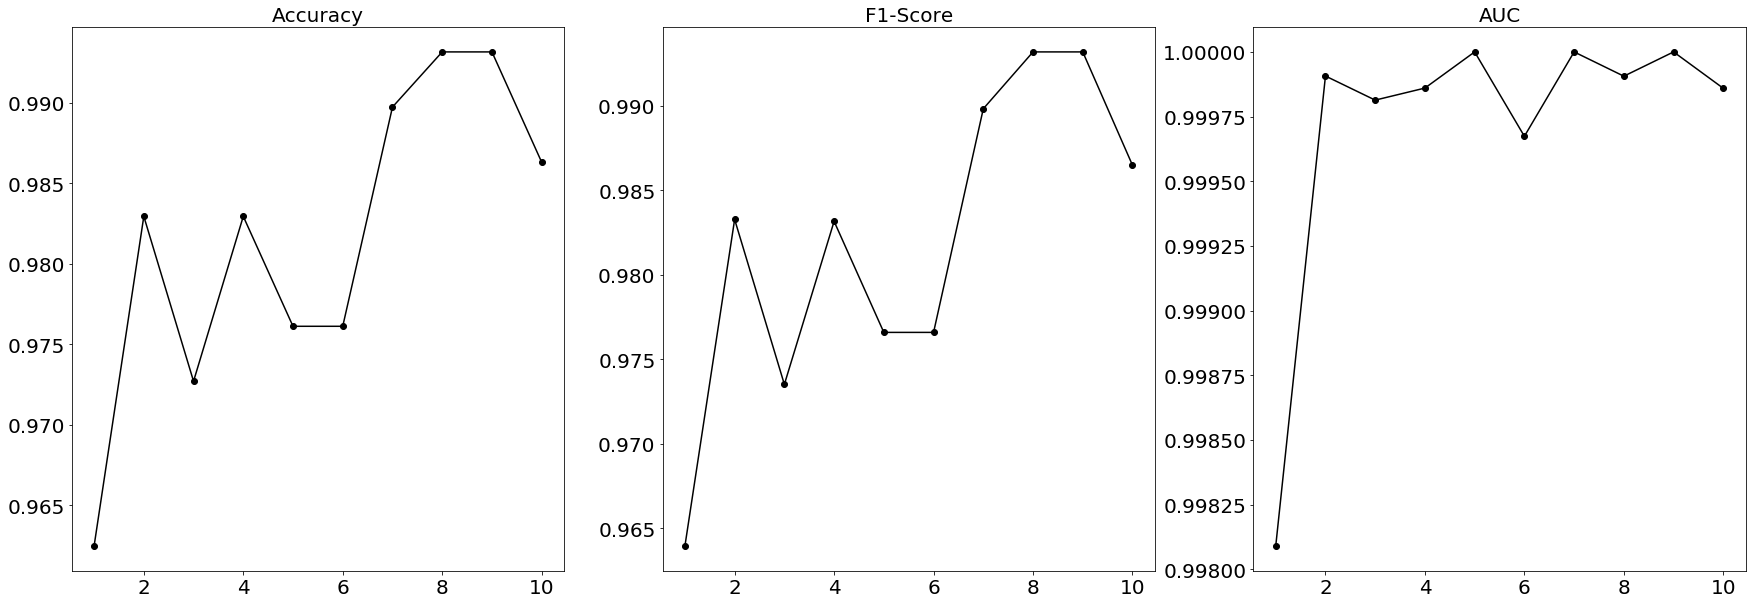

In [13]:
# GDBT(balanced Dataset)
GBDT_model=GradientBoostingClassifier(n_estimators=100,random_state=87)
accuracy=cross_val_score(GBDT_model,X_balanced,y_balanced,scoring='accuracy',cv=10)
F1=cross_val_score(GBDT_model,X_balanced,y_balanced,scoring='f1',cv=10)
AUC=cross_val_score(GBDT_model,X_balanced,y_balanced,scoring='roc_auc',cv=10)

X_label=[]
for i in range(10):
    X_label.append(i+1)

plt.figure(figsize=(30,10))

plt.subplot(1,3,1)
plt.plot(X_label,accuracy, 'ko-')
plt.title("Accuracy",fontsize=20)
plt.tick_params(labelsize=20)

plt.subplot(1,3,2)
plt.plot(X_label,F1, 'ko-')
plt.title("F1-Score",fontsize=20)
plt.tick_params(labelsize=20)

plt.subplot(1,3,3)
plt.plot(X_label,AUC, 'ko-')
plt.title("AUC",fontsize=20)
plt.tick_params(labelsize=20)

plt.show()